In [295]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [296]:
#import classes from iImage.py file
from iImage import iImage, iImageFFT, inverseFilter, wienerFilter, constrainedLS
import numpy as np, matplotlib.pyplot as plt
from skimage.measure import compare_psnr, compare_ssim
import numpy.fft as fp

In [297]:
originalImage=iImage.load("/home/sufiyan/Desktop/Images_for_Assignment2/Original Images/GroundTruth4.jpg")
flt=iImage.load("/home/sufiyan/Downloads/Kernel1G_SingleTile.png")

In [298]:
def degrade(image:np.ndarray, flt:iImageFFT, noise_mean=0, noise_std=255/12)->np.ndarray:
    degraded3d=image.copy()
    degraded3d=np.moveaxis(degraded3d, 2,0)
    degraded3d=fp.fft2(degraded3d)
    degraded3d*=abs(flt.image)
    degraded3d=fp.ifft2(degraded3d).real
    degraded3d=np.moveaxis(degraded3d, 0, 2)
    noise=np.random.normal(noise_mean, noise_std, image.shape)
    degraded3d+=noise
    degraded3d-=degraded3d.min()
    degraded3d*=255/degraded3d.max()
    return degraded3d.astype("uint8")

In [299]:
def deBlur(image:np.ndarray, fltImage:inverseFilter)->np.ndarray:
    cleaned3d=image.copy()
    cleaned3d=np.moveaxis(cleaned3d, 2, 0)
    cleaned3dI=fp.fft2(cleaned3d)
    cleaned3dI*=abs(fltImage.image)
    cleaned3d=fp.ifft2(cleaned3dI).real
    cleaned3d=np.moveaxis(cleaned3d, 0, 2)
    cleaned3d-=cleaned3d.min()
    cleaned3d/=cleaned3d.max()
    cleaned3d*=255
    cleaned3d=cleaned3d.astype("uint8")
    return cleaned3d


In [300]:
originalImage=iImage.load("/home/sufiyan/Desktop/Images_for_Assignment2/Original Images/GroundTruth4.jpg")
flt=iImage.load("/home/sufiyan/Downloads/Kernel1G_SingleTile.png")

Degraded SSIM: 0.814
Degraded PSNR: 25.528
Cleaned SSIM: 0.907
Cleaned PSNR: 27.734


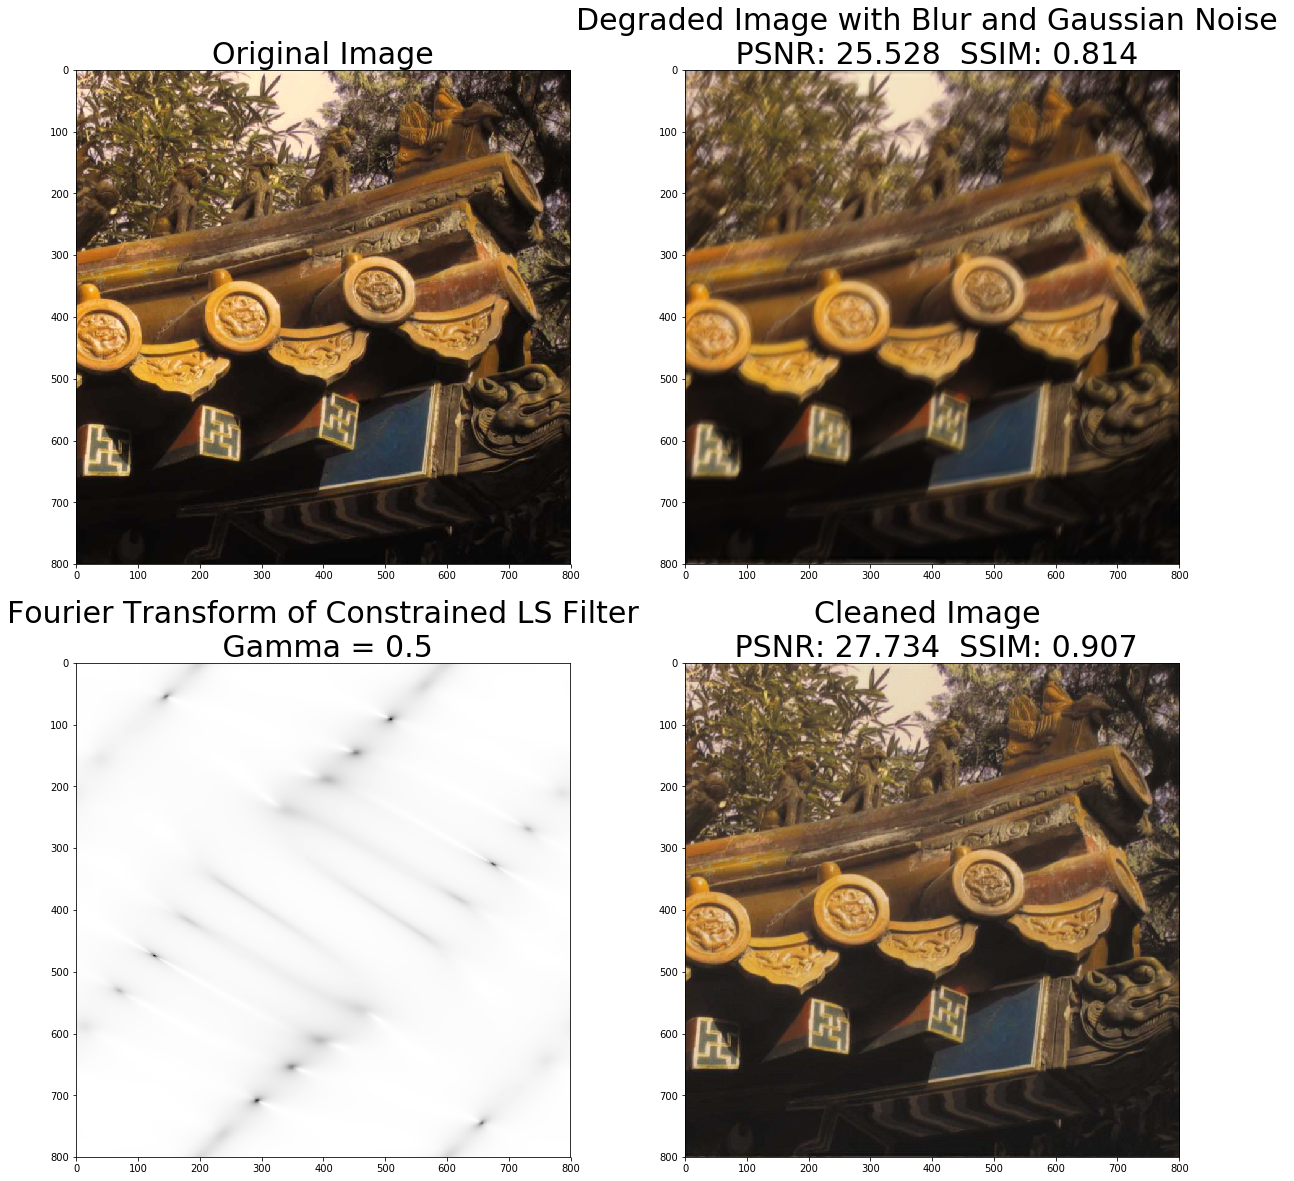

In [303]:
blurFilter=flt.pad(target=originalImage).fft()
cleaningFilter=constrainedLS(flt, target=originalImage,gamma=0.5)
degradedImage=degrade(originalImage.RGBImage, flt=blurFilter)
cleanedImage=deBlur(degradedImage, cleaningFilter)
old_psnr=round(compare_psnr(originalImage.RGBImage, degradedImage),3)
old_ssim=round(compare_ssim(originalImage.RGBImage, degradedImage,multichannel=True),3)
new_psnr=round(compare_psnr(originalImage.RGBImage, cleanedImage),3)
new_ssim=round(compare_ssim(originalImage.RGBImage, cleanedImage,multichannel=True),3)
print(f"Degraded SSIM: {old_ssim}")
print(f"Degraded PSNR: {old_psnr}")
print(f"Cleaned SSIM: {new_ssim}")
print(f"Cleaned PSNR: {new_psnr}")
f,((ax1,ax2), (ax3, ax4))=plt.subplots(2,2,figsize=(20,20))
ax1.imshow(originalImage.RGBImage)
ax1.set_title("Original Image", fontsize=30)
ax2.imshow(degradedImage)
ax2.set_title(f"Degraded Image with Blur and Gaussian Noise \n PSNR: {old_psnr}  SSIM: {old_ssim}", fontsize=30)
# iImage(degradedImage).fft().show(ax3)
# ax3.set_title("Fourier transform of Degraded Image", fontsize=30)
cleaningFilter.show(ax3)
ax3.set_title(f"Fourier Transform of {cleaningFilter.getName()}\n {cleaningFilter.getParam()}", fontsize=30)
ax4.imshow(cleanedImage)
ax4.set_title(f"Cleaned Image \n PSNR: {new_psnr}  SSIM: {new_ssim}", fontsize=30)
f.savefig(f"compare_images/{cleaningFilter.getName()}_{cleaningFilter.getParam()}.png")